In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
DS_jobs=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Projects\\Project 2 D.S jobs\\Data_Science_Jobs_in_India.csv")
DS_jobs

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8L,4.5L,16.0L,841
1,1,Accenture,Data Scientist,2,12.8L,5.8L,23.0L,501
2,2,IBM,Data Scientist,2,13.4L,5.3L,25.0L,394
3,3,Cognizant,Data Scientist,2,9.8L,5.0L,18.0L,318
4,4,Capgemini,Data Scientist,2,8.6L,4.8L,14.6L,300
...,...,...,...,...,...,...,...,...
1597,1597,Collabera Technologies,Data Architect,8,17.0L,12.0L,23.1L,4
1598,1598,Coforge,Data Architect,7,27.1L,18.5L,39.0L,4
1599,1599,Hitachi,Data Architect,21,40.0L,25.0L,50.0L,3
1600,1600,GE Power,Data Architect,7,16.7L,14.9L,19.0L,3


In [3]:
DS_jobs.head()

,Unnamed: 0,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,0,TCS,Data Scientist,2,7.8L,4.5L,16.0L,841
1,1,Accenture,Data Scientist,2,12.8L,5.8L,23.0L,501
2,2,IBM,Data Scientist,2,13.4L,5.3L,25.0L,394
3,3,Cognizant,Data Scientist,2,9.8L,5.0L,18.0L,318
4,4,Capgemini,Data Scientist,2,8.6L,4.8L,14.6L,300


In [4]:
DS_jobs.columns

Index(['Unnamed: 0', 'company_name', 'job_title', 'min_experience',
       'avg_salary', 'min_salary', 'max_salary', 'num_of_salaries'],
      dtype='object')

In [5]:
DS_jobs=DS_jobs[['company_name', 'job_title', 'min_experience',
       'avg_salary', 'min_salary', 'max_salary', 'num_of_salaries']]

In [6]:
DS_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_name     1602 non-null   object
 1   job_title        1602 non-null   object
 2   min_experience   1602 non-null   object
 3   avg_salary       1602 non-null   object
 4   min_salary       1602 non-null   object
 5   max_salary       1602 non-null   object
 6   num_of_salaries  1602 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 87.7+ KB


In [7]:
DS_jobs.duplicated().sum()

0

In [8]:
DS_jobs.dtypes

company_name       object
job_title          object
min_experience     object
avg_salary         object
min_salary         object
max_salary         object
num_of_salaries     int64
dtype: object

In [9]:
DS_jobs['min_experience']=DS_jobs['min_experience'].str.replace(r'[*&#]','',regex=True)
DS_jobs['avg_salary']=DS_jobs['avg_salary'].str.replace('L','',regex=True)
DS_jobs['min_salary']=DS_jobs['min_salary'].str.replace('L','',regex=True)
DS_jobs['max_salary']=DS_jobs['max_salary'].str.replace('L','',regex=True)

In [10]:
DS_jobs.loc[16]

company_name         L&T Infotech
job_title          Data Scientist
min_experience                  2
avg_salary                   11.6
min_salary                    6.5
max_salary                   20.9
num_of_salaries               102
Name: 16, dtype: object

In [11]:
DS_jobs['min_experience']=pd.to_numeric(DS_jobs['min_experience'])
DS_jobs['avg_salary']=pd.to_numeric(DS_jobs['avg_salary'])*100000
DS_jobs['min_salary']=pd.to_numeric(DS_jobs['min_salary'])*100000  
DS_jobs['max_salary']=pd.to_numeric(DS_jobs['max_salary'])*100000

In [12]:
DS_jobs.dtypes

company_name        object
job_title           object
min_experience       int64
avg_salary         float64
min_salary         float64
max_salary         float64
num_of_salaries      int64
dtype: object

## Outlier handling

In [13]:
Q1=DS_jobs['avg_salary'].quantile(0.25)
Q3=DS_jobs['avg_salary'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

outliers= DS_jobs[(DS_jobs['avg_salary'] < lower_bound)| (DS_jobs['avg_salary']> upper_bound)]
# print(f'outliers ditected: {outliers}')
# print(lower_bound)
# print(upper_bound)
len(outliers)

39

In [1]:
# DS_jobs[DS_jobs['avg_salary'] > upper_bound]
# len(DS_jobs[DS_jobs['avg_salary'] > upper_bound])

In [15]:
Q1=DS_jobs['min_salary'].quantile(0.25)
Q3=DS_jobs['min_salary'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

outliers= DS_jobs[(DS_jobs['min_salary'] < lower_bound)| (DS_jobs['min_salary']> upper_bound)]
# print(f'outliers ditected: {outliers}')
# print(lower_bound)
# print(upper_bound)
len(outliers)

49

In [16]:
Q1=DS_jobs['max_salary'].quantile(0.25)
Q3=DS_jobs['max_salary'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

outliers= DS_jobs[(DS_jobs['max_salary'] < lower_bound)| (DS_jobs['max_salary']> upper_bound)]
# print(f'outliers ditected: {outliers}')
# print(lower_bound)
# print(upper_bound)
len(outliers)

40

In [17]:
DS_jobs.head()

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,TCS,Data Scientist,2,780000.0,450000.0,1600000.0,841
1,Accenture,Data Scientist,2,1280000.0,580000.0,2300000.0,501
2,IBM,Data Scientist,2,1340000.0,530000.0,2500000.0,394
3,Cognizant,Data Scientist,2,980000.0,500000.0,1800000.0,318
4,Capgemini,Data Scientist,2,860000.0,480000.0,1460000.0,300


## Problem Statement 1 : Experience vs. Salary Trends

### 1. Are there any outliers in salary for specific experience levels?

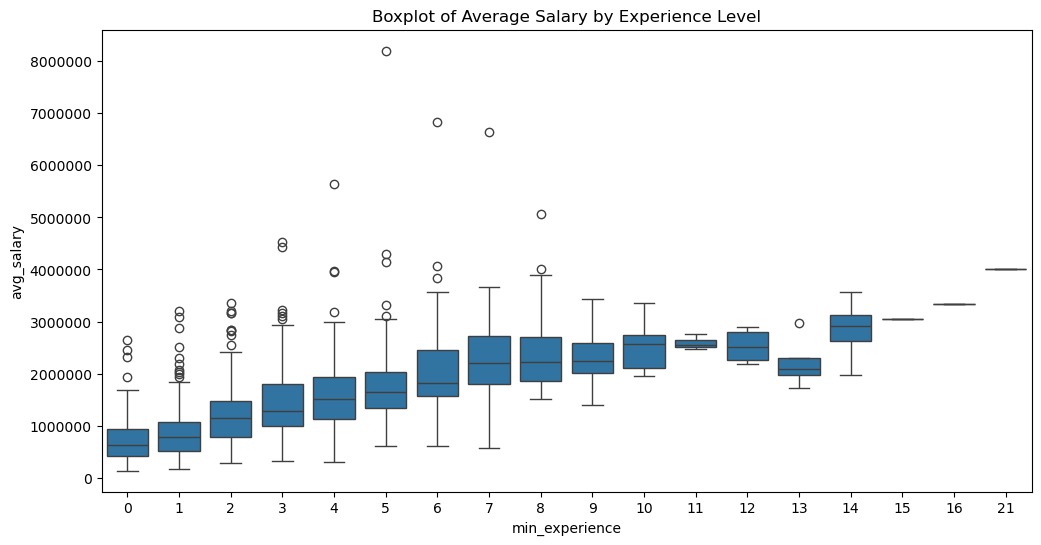

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to identify outliers visually
Box_plot=DS_jobs
plt.figure(figsize=(12,6))
sns.boxplot(x='min_experience', y='avg_salary', data=Box_plot)
plt.title('Boxplot of Average Salary by Experience Level')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



In [19]:
grp = DS_jobs.groupby('min_experience')  # Group by 'min_experience'
# in grp variable there is two this are stored in form of dictionary keys are experiance and values ae rows falls under that keys 
#  by runing loop we have stored keys in exp_level and rows in in rows
outliers_df = pd.DataFrame()  # Empty DataFrame to store all outliers

# Iterate over the grouped data
for exp_level, rows in grp:
    Q1 = rows['avg_salary'].quantile(0.25)  # First Quartile
    Q3 = rows['avg_salary'].quantile(0.75)  # Third Quartile
#     here we have iterated values(group) i.e rows and specific column i.e avg_salary column
    IQR = Q3 - Q1  # Interquartile Range

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = rows[(rows['avg_salary'] < lower_bound) | (rows['avg_salary'] > upper_bound)]

    # Append the outliers to the final DataFrame
    outliers_df = pd.concat([outliers_df, outliers])
#     print(exp_level,lower_bound)
#     print(exp_level,upper_bound)
    
# Display all outliers
outliers_df.reset_index(drop=True)
# len(outliers_df)
# Use outliers_df + concat: When you want to collect outliers from all groups in a single DataFrame.
# Skip outliers_df: When you only care about the most recent group's outliers or are processing groups independently.
# Direct concat within a comprehension: Simplifies code for consolidating all outliers.
    

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,Flipkart,Data Scientist,0,2320000.0,1470000.0,4200000.0,37
1,Autodesk,Data Engineer,0,2650000.0,640000.0,4000000.0,11
2,HSBC,Senior Data Scientist,0,2460000.0,2200000.0,2800000.0,5
3,Qualcomm,Machine Learning Engineer,0,1940000.0,1200000.0,2980000.0,12
4,Microsoft Corporation,Data Scientist,1,3210000.0,1300000.0,6000000.0,81
5,CARS24.com,Data Scientist,1,2030000.0,1450000.0,2400000.0,18
6,Boeing,Data Scientist,1,1940000.0,1350000.0,3500000.0,17
7,Ola Cabs,Data Scientist,1,2190000.0,1300000.0,3000000.0,13
8,Adidas,Data Engineer,1,2300000.0,1450000.0,3400000.0,13
9,Visa,Data Engineer,1,2870000.0,1650000.0,3700000.0,11


In [20]:
grp.groups

{0: [36, 37, 46, 48, 49, 60, 75, 81, 84, 89, 91, 104, 108, 109, 118, 123, 130, 131, 137, 144, 147, 152, 156, 168, 171, 175, 176, 180, 182, 203, 223, 224, 226, 229, 237, 251, 258, 272, 287, 293, 295, 306, 313, 314, 325, 332, 350, 351, 358, 360, 365, 379, 386, 398, 400, 404, 405, 411, 412, 418, 425, 429, 430, 432, 433, 439, 441, 446, 450, 457, 460, 461, 463, 465, 467, 473, 475, 478, 481, 482, 483, 492, 500, 507, 511, 514, 515, 518, 519, 520, 521, 522, 526, 530, 533, 534, 535, 538, 539, 540, ...], 1: [14, 23, 27, 33, 38, 39, 45, 47, 53, 56, 57, 59, 61, 67, 68, 70, 71, 72, 74, 86, 88, 96, 98, 100, 101, 105, 106, 107, 110, 112, 116, 119, 122, 124, 127, 129, 132, 136, 138, 141, 145, 146, 148, 157, 160, 161, 162, 163, 172, 178, 179, 181, 184, 185, 186, 189, 190, 192, 193, 194, 195, 196, 200, 206, 208, 213, 219, 220, 228, 236, 240, 243, 247, 248, 253, 256, 257, 259, 262, 265, 266, 267, 271, 275, 276, 277, 279, 280, 281, 283, 284, 285, 289, 294, 297, 299, 300, 301, 302, 305, ...], 2: [0, 1, 2, 

### 2. How does the minimum experience required correlate with average salary?

In [21]:
Exp_Sal=DS_jobs[['min_experience','avg_salary']]
print(Exp_Sal.head())
print(Exp_Sal.dtypes)

   min_experience  avg_salary
0               2    780000.0
1               2   1280000.0
2               2   1340000.0
3               2    980000.0
4               2    860000.0
min_experience      int64
avg_salary        float64
dtype: object


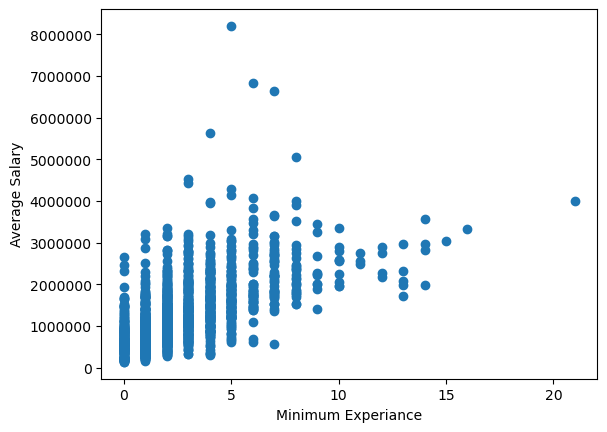

In [22]:
plt.scatter(DS_jobs['min_experience'],DS_jobs['avg_salary'])
# DS_jobs.plot(x='min_experience',y='avg_salary',kind='scatter')
plt.xlabel('Minimum Experiance')
# plt.ylabel('Average Salary (10lacs)')
plt.ylabel('Average Salary')
plt.ticklabel_format(style='plain', axis='y')
# This ticklabel_format with style='plain' will stop the scientific notation and display the full numbers on the y-axis.

# The ticklabel_format function in Matplotlib is used to control the display format of tick labels on the axes of a plot. 
# It allows you to specify how the numbers on the axis should be formatted, 
# especially when the values are very large or very small.

# Parameters:
# style: This specifies the format style for the tick labels. There are two main options:

# 'plain': Display the numbers without scientific notation.
# 'sci': Display the numbers in scientific notation (e.g., 1e+06 for one million).
# axis: This controls which axis the formatting applies to:

# 'x': Apply formatting to the x-axis.
# 'y': Apply formatting to the y-axis.
# 'both': Apply formatting to both the x and y axes.
plt.show()

### 3. What is the average salary for roles requiring less than 2 years of experience?

Average of Average salary for roles requiring less than 2 years of experience :
821401.52 ₹
Average of Average salary for roles requiring more than 2 years of experience :
1755320.33 ₹


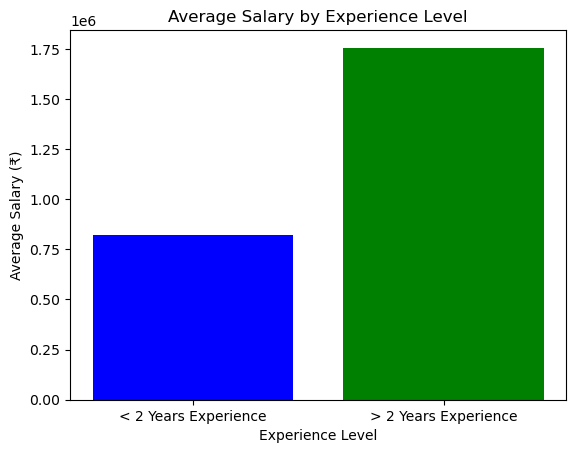

In [23]:
# DS_jobs[['min_experience','avg_salary']][DS_jobs['min_experience']<2]
Avg_sal_exp2=DS_jobs[DS_jobs['min_experience']<2]['avg_salary'].mean()
Avg_sal_moreexp2=DS_jobs[DS_jobs['min_experience']>2]['avg_salary'].mean()

print(f'Average of Average salary for roles requiring less than 2 years of experience :\n{Avg_sal_exp2:.2f} ₹')
print(f'Average of Average salary for roles requiring more than 2 years of experience :\n{Avg_sal_moreexp2:.2f} ₹')

pluto = [Avg_sal_exp2, Avg_sal_moreexp2]
labels = ['< 2 Years Experience', '> 2 Years Experience']

# Plotting
plt.bar(labels, pluto, color=['blue', 'green'])  # Create a bar plot
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (₹)')
plt.show()

### 4. Do jobs requiring 5+ years of experience offer significantly higher salaries?

In [24]:
avg_salary_5_plus = DS_jobs[DS_jobs['min_experience']>=5]['avg_salary'].mean()
avg_salary_less_than_5 = DS_jobs[DS_jobs['min_experience']<5]['avg_salary'].mean()


print(f"Average salary for jobs with 5+ years of experience: {avg_salary_5_plus:.2f} ₹")
print(f"Average salary for jobs with less than 5 years of experience: {avg_salary_less_than_5:.2f} ₹")

Average salary for jobs with 5+ years of experience: 2112278.91 ₹
Average salary for jobs with less than 5 years of experience: 1146192.66 ₹


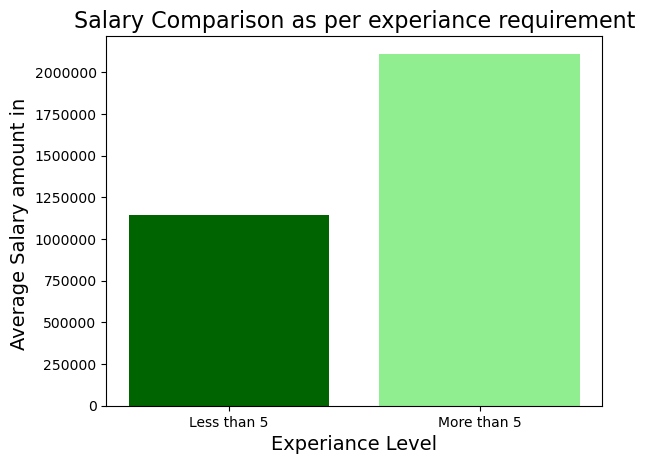

In [25]:
avg_salry_asper_exp=[avg_salary_less_than_5,avg_salary_5_plus]
xlabel=['Less than 5','More than 5']

plt.bar(xlabel,avg_salry_asper_exp,color=['darkgreen','lightgreen'])
plt.xlabel('Experiance Level',fontsize=14)
plt.ylabel('Average Salary amount in ',fontsize=14)
plt.title('Salary Comparison as per experiance requirement', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

### 5. Which companies offer the best salaries for entry-level roles?

In [26]:
co_sal_entrylevel=DS_jobs[DS_jobs['min_experience']<=3][['company_name','avg_salary']].sort_values(by='avg_salary',ascending=False).reset_index(drop=True)
co_sal_entrylevel.head(20)

,company_name,avg_salary
0,Google,4530000.0
1,Kyndryl,4440000.0
2,Apple,3360000.0
3,Chegg,3220000.0
4,Microsoft Corporation,3210000.0
5,Yodlee,3210000.0
6,Samsung Research,3170000.0
7,Paytm,3160000.0
8,Blue Yonder,3160000.0
9,Oyo Rooms,3100000.0


### 6. How do the minimum and maximum salaries vary with experience requirements?

In [27]:
DS_jobs['label_to_experiance']=pd.cut(DS_jobs['min_experience'],bins=[0,3,7,11,float('inf')],
                           labels=['Entry-Level','Mid-Level','Senior-Level','Super_Senior-Level'])
min_max_salary_with_EX=DS_jobs.groupby('label_to_experiance')[['min_salary','max_salary']].mean()
pd.options.display.float_format = '{:.2f}'.format
print(f'{min_max_salary_with_EX}')

                     min_salary  max_salary
label_to_experiance                        
Entry-Level           694287.22  1724646.25
Mid-Level            1230334.13  2477112.17
Senior-Level         1894600.00  3123800.00
Super_Senior-Level   2140000.00  3352500.00


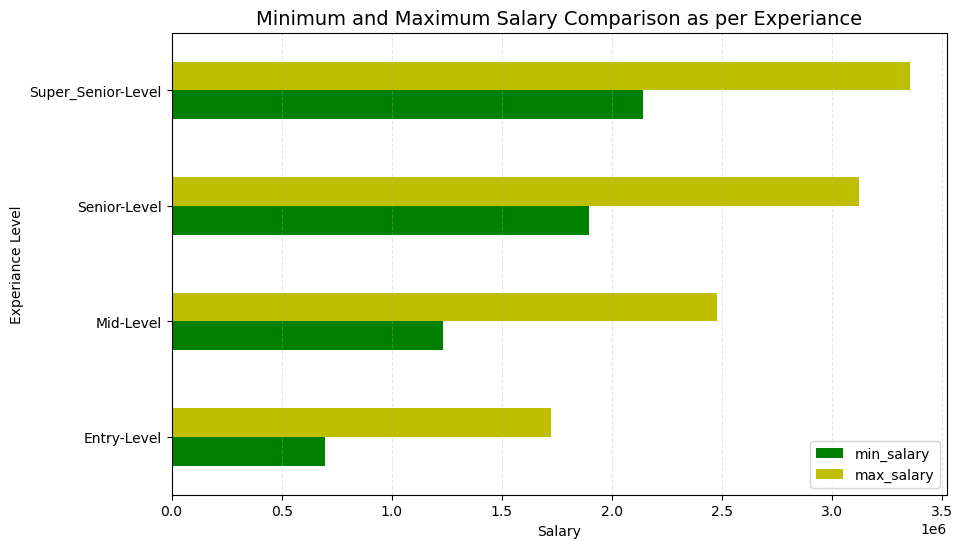

In [28]:
min_max_salary_with_EX.plot(kind='barh',color=('g','y'),figsize=(10,6))
plt.xlabel('Salary')
plt.ylabel('Experiance Level')
plt.title('Minimum and Maximum Salary Comparison as per Experiance', fontsize=14)
# plt.legend('Min Salary','Max Salary')
plt.grid(linestyle='--',alpha=0.3,axis='x')
plt.show()

### 7. What is the trend in salary ranges as experience increases?

In [29]:
DS_jobs.columns

Index(['company_name', 'job_title', 'min_experience', 'avg_salary',
       'min_salary', 'max_salary', 'num_of_salaries', 'label_to_experiance'],
      dtype='object')

In [30]:
print(DS_jobs['avg_salary'].max())
print(DS_jobs['avg_salary'].min())

8200000.0
140000.0


In [31]:
salary_range = [0, 1000000, 2000000, 3000000, 4000000, 5000000,6000000,7000000,float('inf')]
bin_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
DS_jobs['salary_range'] = pd.cut(DS_jobs['avg_salary'], bins=salary_range, labels=bin_labels)
DS_jobs.head()

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries,label_to_experiance,salary_range
0,TCS,Data Scientist,2,780000.00,450000.00,1600000.00,841,Entry-Level,0-10
1,Accenture,Data Scientist,2,1280000.00,580000.00,2300000.00,501,Entry-Level,10-20
2,IBM,Data Scientist,2,1340000.00,530000.00,2500000.00,394,Entry-Level,10-20
3,Cognizant,Data Scientist,2,980000.00,500000.00,1800000.00,318,Entry-Level,0-10
4,Capgemini,Data Scientist,2,860000.00,480000.00,1460000.00,300,Entry-Level,0-10


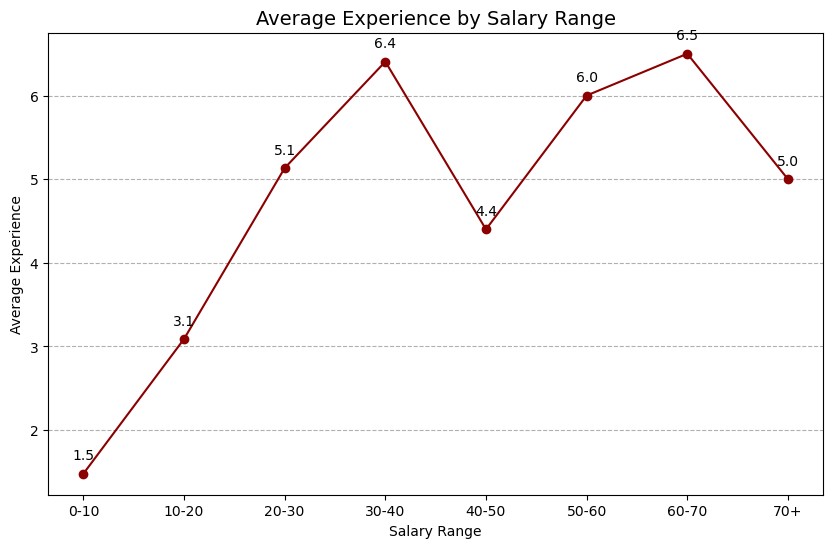

In [32]:
sal_range_asper_exp=DS_jobs.groupby('salary_range')['min_experience'].mean()
# Plot the line chart
sal_range_asper_exp.plot(kind='line', color='darkred', marker='o', label=False, figsize=(10, 6))

# Annotate points on the chart
for i, value in enumerate(sal_range_asper_exp):
    plt.annotate(f'{value:.1f}', 
                 (i, value), 
                 textcoords="offset points", 
                 xytext=(0, 10),  # Adjust annotation offset
                 ha='center',fontsize=10)
plt.xlabel('Salary Range')
plt.ylabel('Average Experience')
plt.title('Average Experience by Salary Range',fontsize=14)
plt.xticks(range(len(sal_range_asper_exp.index)), sal_range_asper_exp.index, rotation=360)  # Set x-ticks properly
plt.grid(axis='y', linestyle='--', alpha=1)

# Show the plot
plt.show()

In [33]:
# Calculate mode for min_experience grouped by salary_range
sal_range_asper_exp_mode = DS_jobs.groupby('salary_range')['min_experience'].agg(lambda x: x.mode())
# this will consider 0th value from the list if mode is giving 2 values but it will show error if any value is nan in list
#  for that we can use if condition to ignore NAN value.here,group 70-80 has no value which shows NAN in out put so giving error
print(sal_range_asper_exp_mode)

salary_range
0-10          1
10-20         2
20-30         4
30-40    [6, 7]
40-50    [3, 5]
50-60    [4, 8]
60-70    [6, 7]
70+           5
Name: min_experience, dtype: object


In [34]:
sal_range_asper_exp[sal_range_asper_exp.isna()]

Series([], Name: min_experience, dtype: float64)

In [35]:
# Calculate mode for min_experience grouped by salary_range
sal_range_asper_exp_mode = DS_jobs.groupby('salary_range')['min_experience'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(sal_range_asper_exp_mode)

salary_range
0-10     1
10-20    2
20-30    4
30-40    6
40-50    3
50-60    4
60-70    6
70+      5
Name: min_experience, dtype: int64


In [36]:
# just EG
grouped=DS_jobs.groupby(['company_name'])

In [37]:
# just EG
grouped.get_group(('Apple'))

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries,label_to_experiance,salary_range
170,Apple,Data Scientist,2,3360000.00,820000.00,7450000.00,15,Entry-Level,30-40
721,Apple,Data Engineer,3,2500000.00,1700000.00,3500000.00,11,Entry-Level,20-30


## Problem Statement 2 : Salary Distribution Analysis

### 1. What is the overall distribution of average salaries in the dataset?

In [38]:
DS_jobs.groupby('salary_range').size()

salary_range
0-10     645
10-20    699
20-30    211
30-40     37
40-50      5
50-60      2
60-70      2
70+        1
dtype: int64

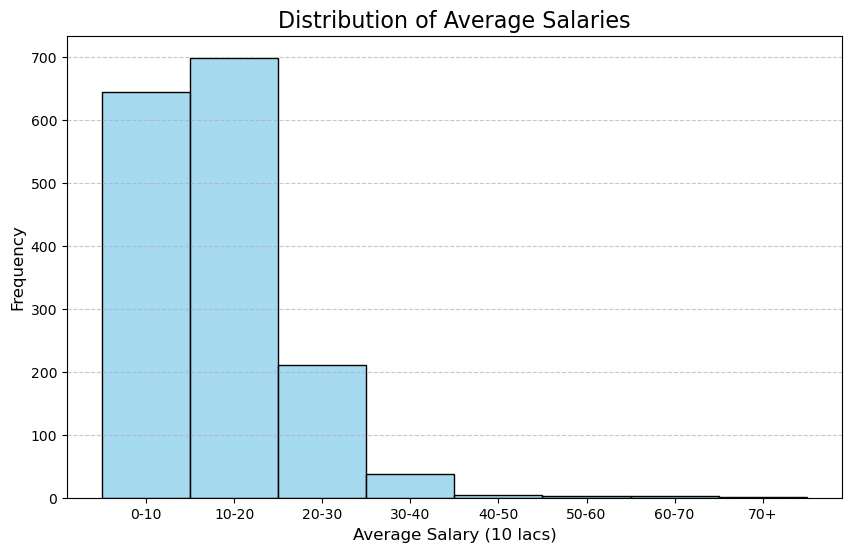

In [39]:
# Histogram to visualize the distribution
plt.figure(figsize=(10, 6))
# plt.hist(DS_jobs['salary_range'], color='skyblue', edgecolor='black',bins=7)
sns.histplot(DS_jobs['salary_range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Average Salaries', fontsize=16)
plt.xlabel('Average Salary (10 lacs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.ticklabel_format(style='plain', axis='x')
plt.show()

### 2. What percentage of jobs have average salaries above ₹10 LPA (Lakhs Per Annum)?

In [40]:
pr_jobs_sal_morethan_10=len(DS_jobs[DS_jobs['avg_salary']>1000000])/len(DS_jobs)*100
print(f'Percentage of jobs have average salaries above ₹10 LPA:\n{pr_jobs_sal_morethan_10:.2f}%')

Percentage of jobs have average salaries above ₹10 LPA:
59.74%


In [41]:
pr_jobs_sal_lessthan_10=len(DS_jobs[DS_jobs['avg_salary']<=1000000])/len(DS_jobs)*100
print(f'Percentage of jobs have average salaries above ₹10 LPA:\n{pr_jobs_sal_lessthan_10:.2f}%')

Percentage of jobs have average salaries above ₹10 LPA:
40.26%


In [42]:
# optional
pr_jobs_sal_morethan_10=DS_jobs[DS_jobs['avg_salary']>1000000].size/DS_jobs.size*100
print(f'Percentage of jobs have average salaries above ₹10 LPA:\n{pr_jobs_sal_morethan_10:.2f}%')

Percentage of jobs have average salaries above ₹10 LPA:
59.74%


In [43]:
# plt.pie??

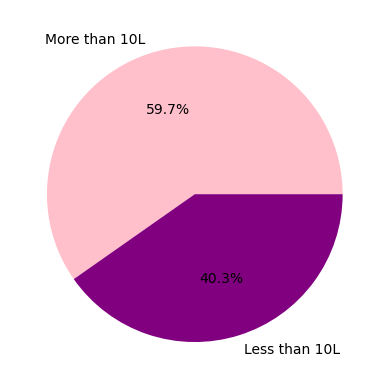

In [44]:
plt.pie(x=[pr_jobs_sal_morethan_10,pr_jobs_sal_lessthan_10],colors=['pink','purple'],labels=['More than 10L','Less than 10L'],autopct='%1.1f%%')
plt.show()

### 3. How do minimum and maximum salaries compare across different companies?

In [45]:
DS_jobs['company_name'].unique().size

642

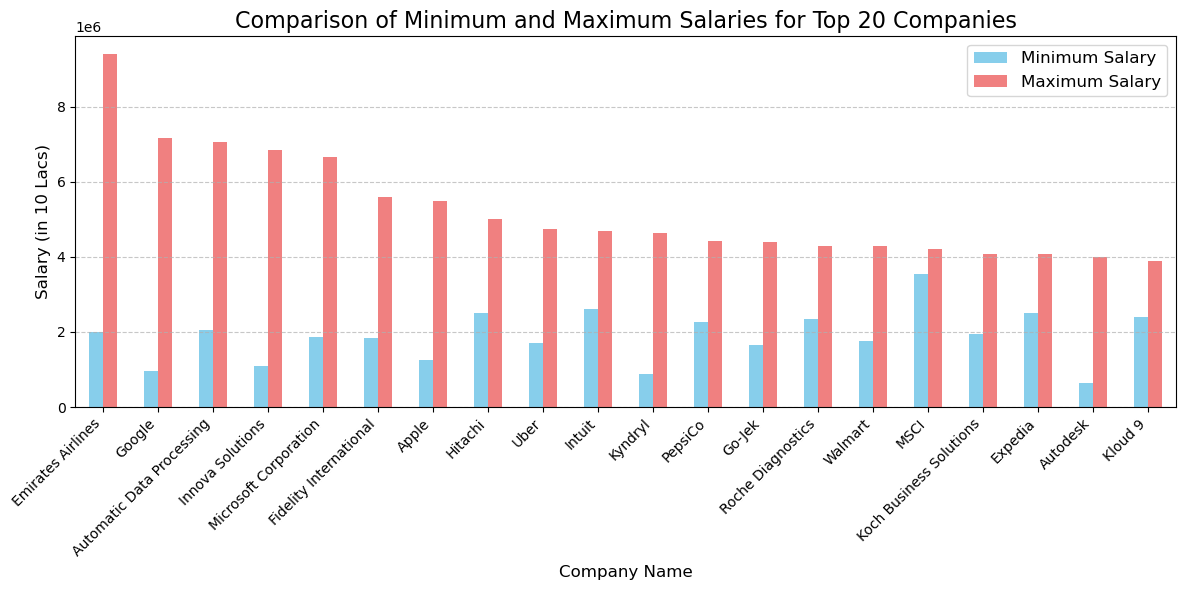

In [46]:
## Select top 10 companies with the highest average salaries
companies =DS_jobs.groupby('company_name')[['min_salary','max_salary']].mean()
top_companies =companies.nlargest(20,'max_salary')
# top companies whose has highest max salary
# Plotting
top_companies.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Comparison of Minimum and Maximum Salaries for Top 20 Companies', fontsize=16)
plt.ylabel('Salary (in 10 Lacs)', fontsize=12)
plt.xlabel('Company Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Minimum Salary', 'Maximum Salary'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
companies

,min_salary,max_salary
company_name,,
3i Infotech,540000.00,1245000.00
AAIC Technologies,600000.00,1480000.00
ABB Group,830000.00,1900000.00
ABC,490000.00,2800000.00
ACL Digital,1070000.00,2500000.00
...,...,...
iNeuron.ai,300000.00,800000.00
iOPEX Technologies,350000.00,1200000.00
nThrive Global Solutions,780000.00,1760000.00


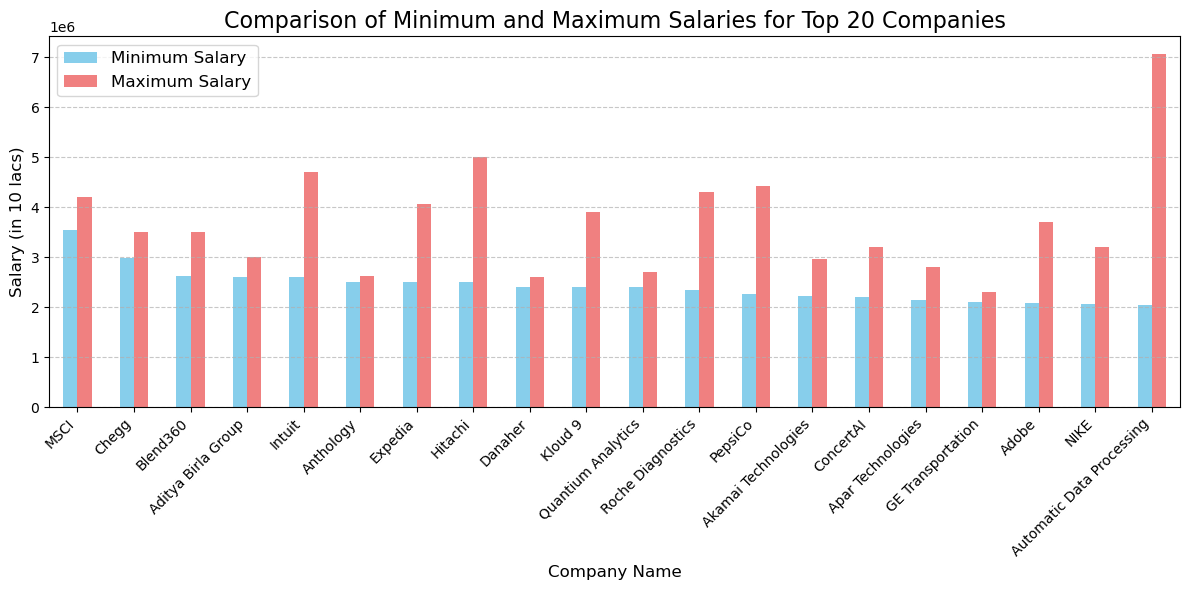

In [48]:
## Select top 10 companies with the highest average salaries
top_companies_min =companies.nlargest(20,'min_salary')
# top companies whose has highest min salary
# Plotting
top_companies_min.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Comparison of Minimum and Maximum Salaries for Top 20 Companies', fontsize=16)
plt.ylabel('Salary (in 10 lacs)', fontsize=12)
plt.xlabel('Company Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Minimum Salary', 'Maximum Salary'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Kloud 9 ki max and min salry dono to 20 me hai

### 4. Are there significant gaps between the average salary and the minimum/maximum salaries?

In [49]:
DS_jobs['diff_bw_avg_min']=DS_jobs['avg_salary']-DS_jobs['min_salary']
DS_jobs['diff_bw_avg_max']=DS_jobs['max_salary']-DS_jobs['avg_salary']

In [50]:
DS_jobs.head()

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries,label_to_experiance,salary_range,diff_bw_avg_min,diff_bw_avg_max
0,TCS,Data Scientist,2,780000.00,450000.00,1600000.00,841,Entry-Level,0-10,330000.00,820000.00
1,Accenture,Data Scientist,2,1280000.00,580000.00,2300000.00,501,Entry-Level,10-20,700000.00,1020000.00
2,IBM,Data Scientist,2,1340000.00,530000.00,2500000.00,394,Entry-Level,10-20,810000.00,1160000.00
3,Cognizant,Data Scientist,2,980000.00,500000.00,1800000.00,318,Entry-Level,0-10,480000.00,820000.00
4,Capgemini,Data Scientist,2,860000.00,480000.00,1460000.00,300,Entry-Level,0-10,380000.00,600000.00


<Axes: >

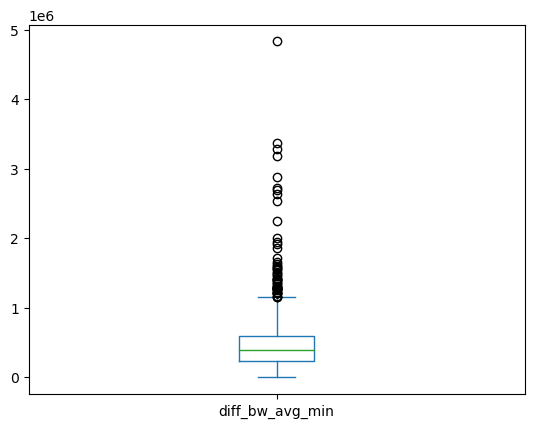

In [51]:
DS_jobs.plot(x='job_title',y='diff_bw_avg_min',kind='box')

In [52]:
# Calculate Q1, Q3, and IQR
Q1 = DS_jobs['diff_bw_avg_min'].quantile(0.25)
Q3 = DS_jobs['diff_bw_avg_min'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the limit for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# get the outliers
outliers = DS_jobs[(DS_jobs['diff_bw_avg_min'] < lower_bound) | (DS_jobs['diff_bw_avg_min'] > upper_bound)]

# Display Extream gap bw avg salary and minimum salary than other's salary gap
outliers[['job_title','diff_bw_avg_min']].reset_index(drop=True)

,job_title,diff_bw_avg_min
0,Data Scientist,1860000.00
1,Data Scientist,1910000.00
2,Data Scientist,1270000.00
3,Data Scientist,1290000.00
4,Data Scientist,1270000.00
5,Data Scientist,1210000.00
6,Data Scientist,1400000.00
7,Data Scientist,2540000.00
8,Data Scientist,1270000.00
9,Data Analyst,1290000.00


<Axes: >

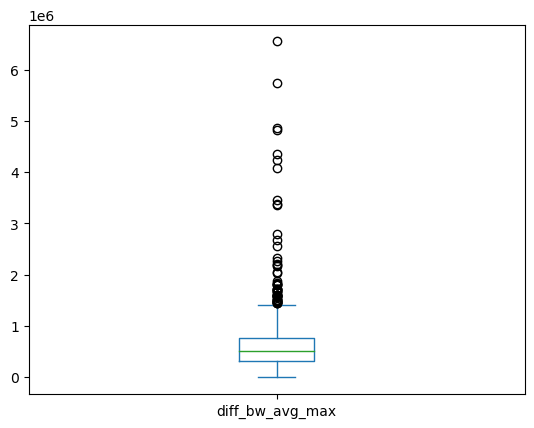

In [53]:
DS_jobs.plot(x='job_title',y='diff_bw_avg_max',kind='box')

In [54]:
# Calculate Q1, Q3, and IQR
Q1 = DS_jobs['diff_bw_avg_max'].quantile(0.25)
Q3 = DS_jobs['diff_bw_avg_max'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = DS_jobs[(DS_jobs['diff_bw_avg_max'] < lower_bound) | (DS_jobs['diff_bw_avg_max'] > upper_bound)]

# Display Extream gap bw avg salary and maximum salary than other's salary gap
outliers[['job_title','diff_bw_avg_max']].reset_index(drop=True)

,job_title,diff_bw_avg_max
0,Data Scientist,1470000.00
1,Data Scientist,2190000.00
2,Data Scientist,2790000.00
3,Data Scientist,1440000.00
4,Data Scientist,1730000.00
5,Data Scientist,2270000.00
6,Data Scientist,1880000.00
7,Data Scientist,1580000.00
8,Data Scientist,1580000.00
9,Data Scientist,1590000.00


In [55]:
data=DS_jobs['diff_bw_avg_max'].value_counts()
data.reset_index()
# data[data['count']>5]['diff_bw_avg_max']


,diff_bw_avg_max,count
0,650000.00,22
1,400000.00,22
2,430000.00,22
3,330000.00,20
4,420000.00,20
...,...,...
378,780000.00,1
379,900000.00,1
380,1610000.00,1
381,930000.00,1


### 5. What is the median salary across all jobs ?

In [56]:
# DS_jobs.groupby('job_title')['avg_salary'].size().sort_values(ascending=False)
median_for_all_job=DS_jobs.groupby('job_title')['avg_salary']
md_sa=pd.DataFrame()
for title,sal in median_for_all_job:
    print('Median salary for', title, 'job is :' ,sal.median())
    dict1= {'job_title':title , 'median_sal' : sal.median()}
    hi=pd.DataFrame(dict1,index=[title])
    md_sa=pd.concat([md_sa,hi])
md_sa.reset_index(drop=True)

Median salary for Business Analyst job is : 830000.0000000001
Median salary for Data Analyst job is : 500000.0
Median salary for Data Architect job is : 2425000.0
Median salary for Data Engineer job is : 1085000.0
Median salary for Data Scientist job is : 1280000.0
Median salary for Machine Learning Engineer job is : 910000.0
Median salary for Senior Business Analyst job is : 1300000.0
Median salary for Senior Data Analyst job is : 860000.0
Median salary for Senior Data Engineer job is : 1760000.0000000002
Median salary for Senior Data Scientist job is : 2120000.0


,job_title,median_sal
0,Business Analyst,830000.00
1,Data Analyst,500000.00
2,Data Architect,2425000.00
3,Data Engineer,1085000.00
4,Data Scientist,1280000.00
5,Machine Learning Engineer,910000.00
6,Senior Business Analyst,1300000.00
7,Senior Data Analyst,860000.00
8,Senior Data Engineer,1760000.00
9,Senior Data Scientist,2120000.00


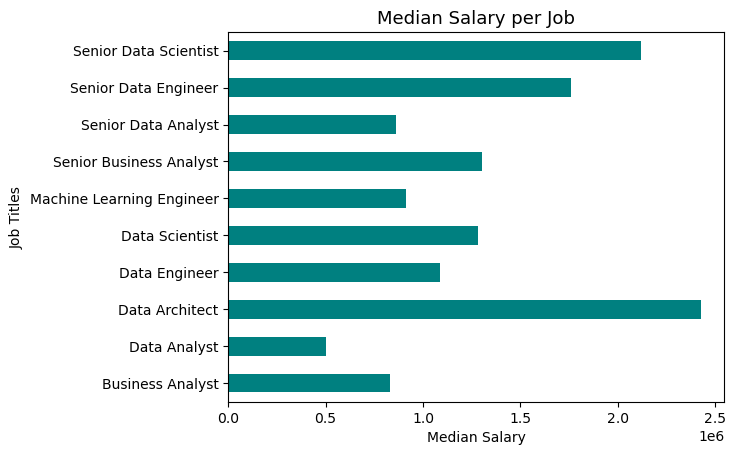

In [57]:
md_sa.plot(kind='barh',color='teal',legend=False)
plt.xlabel('Median Salary')
plt.ylabel('Job Titles')
plt.title('Median Salary per Job',fontsize=13)
plt.show()

### 6.  Are there clusters of jobs with similar salary ranges?

In [58]:
DS_jobs.groupby('job_title')['salary_range'].count().sort_values(ascending=False)

job_title
Business Analyst             188
Data Engineer                188
Data Scientist               188
Data Analyst                 187
Senior Business Analyst      187
Senior Data Analyst          187
Senior Data Scientist        185
Senior Data Engineer         183
Machine Learning Engineer     59
Data Architect                50
Name: salary_range, dtype: int64

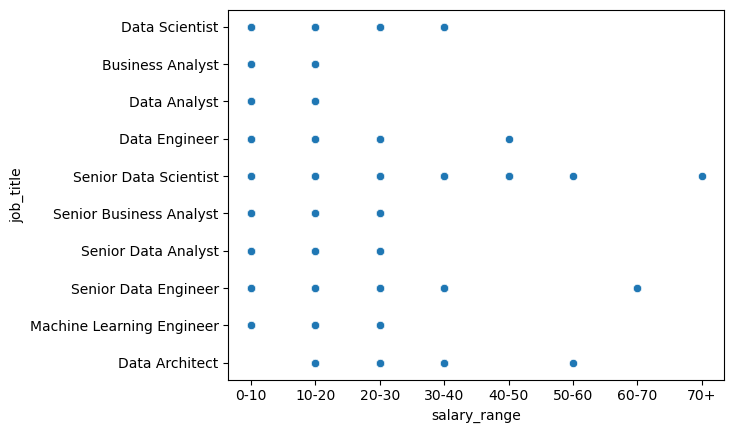

salary_range
0-10      58
10-20    109
20-30     18
30-40      3
40-50      0
50-60      0
60-70      0
70+        0
dtype: int64

In [59]:
sns.scatterplot(x='salary_range',y='job_title',data=DS_jobs)
plt.show()
# total 4 ranges fall under data scientist role
DS_jobs[DS_jobs['job_title']=='Data Scientist'].groupby('salary_range').size()

In [60]:
DS_jobs.groupby('salary_range')['job_title'].size()

salary_range
0-10     645
10-20    699
20-30    211
30-40     37
40-50      5
50-60      2
60-70      2
70+        1
Name: job_title, dtype: int64

In [61]:
DS_jobs[DS_jobs['job_title']=='Business Analyst'].groupby('salary_range').size()

salary_range
0-10     131
10-20     57
20-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70+        0
dtype: int64

In [62]:
DS_jobs[DS_jobs['job_title']=='Data Engineer'].groupby('salary_range').size()

salary_range
0-10     73
10-20    99
20-30    15
30-40     0
40-50     1
50-60     0
60-70     0
70+       0
dtype: int64

In [63]:
DS_jobs[DS_jobs['job_title']=='Data Analyst'].groupby('salary_range').size()

salary_range
0-10     168
10-20     19
20-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70+        0
dtype: int64

### 7. Which job titles or companies contribute to the extreme salary values (high/low)

job_title
Business Analyst              2
Data Analyst                  8
Data Architect                1
Data Engineer                12
Data Scientist                8
Machine Learning Engineer     2
Senior Business Analyst       3
Senior Data Analyst           2
Senior Data Engineer          5
Senior Data Scientist        10
dtype: int64


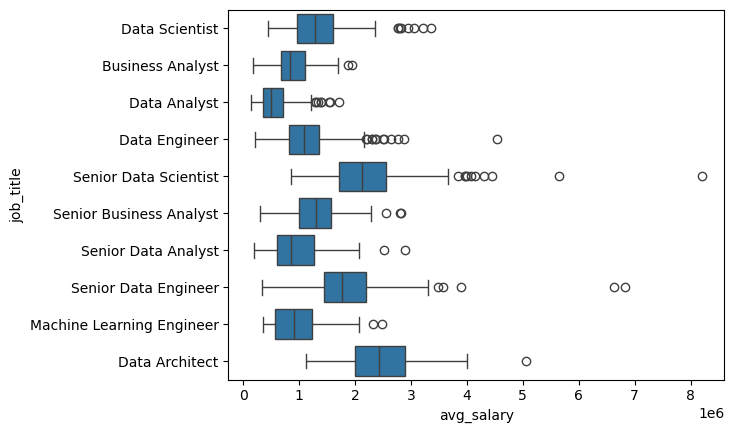

In [64]:
grp = DS_jobs.groupby('job_title')  # Group by 'min_experience'
# in grp variable there is two this are stored in form of dictionary keys are experiance and values ae rows falls under that keys 
#  by runing loop we have stored keys in exp_level and rows in in rows
outliers_df = pd.DataFrame()  # Empty DataFrame to store all outliers

# Iterate over the grouped data
for exp_level, rows in grp:
    Q1 = rows['avg_salary'].quantile(0.25)  # First Quartile
    Q3 = rows['avg_salary'].quantile(0.75)  # Third Quartile
#     here we have iterated values(group) i.e rows and specific column i.e avg_salary column
    IQR = Q3 - Q1  # Interquartile Range

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = rows[(rows['avg_salary'] < lower_bound) | (rows['avg_salary'] > upper_bound)]

    # Append the outliers to the final DataFrame
    outliers_df = pd.concat([outliers_df, outliers])
#     print(exp_level,lower_bound)
#     print(exp_level,upper_bound)
    
# Display all outliers
extreme=outliers_df[['job_title','avg_salary']]
print(extreme.groupby('job_title').size())


# Display Extream gap bw avg salary and maximum salary than other's salary gap
# extreme_avg_salary_jobs=outliers[['job_title','avg_salary']].reset_index(drop=True)
# print(extreme_avg_salary_jobs.groupby('job_title')['avg_salary'].count())
sns.boxplot(x='avg_salary',y='job_title',data=DS_jobs)
plt.show()

In [65]:
grp = DS_jobs.groupby('company_name')  # Group by 'min_experience'
# in grp variable there is two this are stored in form of dictionary keys are experiance and values ae rows falls under that keys 
#  by runing loop we have stored keys in exp_level and rows in in rows
outliers_df = pd.DataFrame()  # Empty DataFrame to store all outliers

# Iterate over the grouped data
for exp_level, rows in grp:
    Q1 = rows['avg_salary'].quantile(0.25)  # First Quartile
    Q3 = rows['avg_salary'].quantile(0.75)  # Third Quartile
#     here we have iterated values(group) i.e rows and specific column i.e avg_salary column
    IQR = Q3 - Q1  # Interquartile Range

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = rows[(rows['avg_salary'] < lower_bound) | (rows['avg_salary'] > upper_bound)]

    # Append the outliers to the final DataFrame
    outliers_df = pd.concat([outliers_df, outliers])
#     print(exp_level,lower_bound)
#     print(exp_level,upper_bound)
    
# Display all outliers
extreme=outliers_df[['company_name','avg_salary']]
print(extreme.groupby('company_name').size())

#### box plot not ploted as so many company in data

company_name
Accenture                                     1
BCG                                           1
Bajaj Finserv                                 1
Barclays                                      1
Cerner                                        1
Cgi Group                                     1
Citibank                                      2
Citicorp                                      1
Coforge                                       1
Dell                                          1
Deloitte                                      1
Ericsson                                      1
Fidelity National Information Services        1
First Source                                  1
Fiserv                                        1
Flipkart                                      1
GEP Worldwide                                 1
HDFC Bank                                     1
HSBC                                          1
Hexaware Technologies                         2
IQVIA                      

### Above code is to identify the outliers withing a company
#### applies different bounds for each company. A salary that is an outlier globally might not be an outlier within its company's context .

### Below code is to identify outlier from whole dataset
#### applies the same global bounds to all companies. This may result in identifying some companies as having outliers that wouldn't be considered outliers within their group.

In [66]:
Q1 = DS_jobs['avg_salary'].quantile(0.25)
Q3 = DS_jobs['avg_salary'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = DS_jobs[(DS_jobs['avg_salary'] < lower_bound) | (DS_jobs['avg_salary'] > upper_bound)]

# Display Extream gap bw avg salary and maximum salary than other's salary gap
extreme_avg_salary_co=outliers[['company_name','avg_salary']].reset_index(drop=True)
extreme_avg_salary_co.groupby('company_name')['avg_salary'].size()

company_name
Adobe                             2
Amazon                            2
Apple                             1
Automatic Data Processing         2
Bajaj Finserv                     1
Blue Yonder                       1
Chegg                             1
Commonwealth Bank of Australia    2
Emirates Airlines                 1
Expedia                           1
Fidelity International            1
Flipkart                          1
Freelance Consultants             1
Google                            1
Hitachi                           1
Innova Solutions                  1
Intuit                            1
JP Morgan Chase                   1
Koch Business Solutions           1
Kyndryl                           1
MSCI                              1
Microsoft Corporation             2
PayPal                            1
Paytm                             1
PepsiCo                           1
Roche Diagnostics                 1
SAP                               1
Samsung Researc

### Are there significant differences in salary distributions for jobs with the same title but different companies?

In [69]:
# same title diffrent companies
DS_jobs.head(2)

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries,label_to_experiance,salary_range,diff_bw_avg_min,diff_bw_avg_max
0,TCS,Data Scientist,2,780000.00,450000.00,1600000.00,841,Entry-Level,0-10,330000.00,820000.00
1,Accenture,Data Scientist,2,1280000.00,580000.00,2300000.00,501,Entry-Level,10-20,700000.00,1020000.00


In [85]:
B_A=DS_jobs[DS_jobs['job_title']=='Business Analyst']
B_A[['company_name','job_title','avg_salary']]
# we can do like 1st get averae of average/median and copare with salary at each company and find the outliers from that

Q1=B_A['avg_salary'].quantile(0.25)
Q3=B_A['avg_salary'].quantile(0.75)
IQR=Q3-Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_B_A = B_A[(B_A['avg_salary'] < lower_bound) | (B_A['avg_salary'] > upper_bound)]
outliers_B_A

,company_name,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries,label_to_experiance,salary_range,diff_bw_avg_min,diff_bw_avg_max
210,Shell,Business Analyst,4,1950000.00,1200000.00,3000000.00,258,Mid-Level,10-20,750000.00,1050000.00
225,NetCracker,Business Analyst,5,1870000.00,1200000.00,2800000.00,159,Mid-Level,10-20,670000.00,930000.00
